# MARKET BASKET ANALYSIS

##Explore
1. Which day & at which hour does.....
     * customer purchase our products the most?
     * customer AVG REORDERED our products the most?

2. How many days does the customers usually come back and buy again from us? (and out of all these orders, how many of them are reorders (returning customers) ?)

3. How many products are there in a single order ?
4. Which products that....
    * customer purchased the most ? 
    * customer AVG REORDERED the most ?
5. Which aisles that....
    * customer purchased the most ? 
    * customer AVG REORDERED the most ?
6. Which depts that....
    * customer purchased the most ? 
    * customer AVG REORDERED the most ?

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

# garbage collector to free up memory
import gc
gc.enable()

# remove warnings
import warnings
warnings.filterwarnings('ignore')



In [22]:
order_prod_prior =pd.read_csv('D:\Documents\order_products__prior.csv')
aisles =pd.read_csv(r'D:\Documents\aisles.csv')
products =pd.read_csv(r'D:\Documents\products.csv')
orders =pd.read_csv(r'D:\Documents\orders.csv')
depts =pd.read_csv(r'D:\Documents\departments.csv')
order_prod_train =pd.read_csv(r'D:\Documents\order_products__train.csv')


In [23]:
print(f" aisles : {aisles.shape} \n depts : {depts.shape} \n order_prod_prior : {order_prod_prior.shape} \n order_prod_train : {order_prod_train.shape}\n orders : {orders.shape} \n products : {products.shape}")

 aisles : (134, 2) 
 depts : (21, 2) 
 order_prod_prior : (1048575, 4) 
 order_prod_train : (1048575, 4)
 orders : (987959, 10) 
 products : (49688, 4)


#   #1

In [24]:
# Which day & at which hour does customer purchase our products the most?


# group data by order_dow, order_hour_of_day, and count order_number
grouped_df = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df.head(3)


,order_dow,order_hour_of_day,order_number
0,0,0,1114
1,0,1,662
2,0,2,418


In [25]:
# turn it to heatmap-suited format, by pivot it
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_df.head(3)

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,1114,662,418,298,214,346,920,3459,8049,11697,...,15735,15551,14266,11314,8611,6531,5239,4128,3239,1997
1,1037,531,328,232,257,448,1568,4740,9863,14887,...,13457,13335,12888,10631,8464,6393,4596,3446,2544,1594
2,880,444,249,205,225,404,1365,3810,7108,10473,...,10843,11005,10857,9275,7616,5797,4254,3118,2350,1528


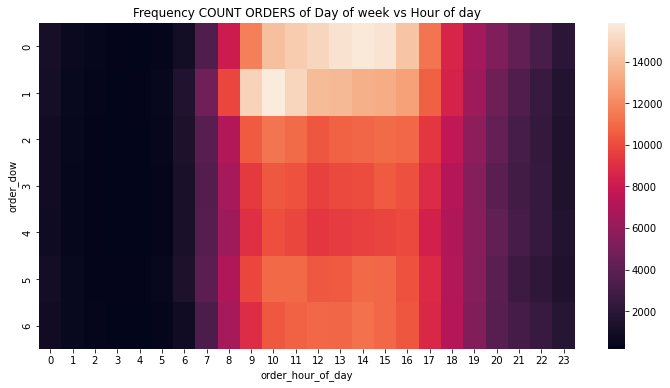

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency COUNT ORDERS of Day of week vs Hour of day")
plt.show()

In [27]:
# Result
# Saturday 12.00-16.00 & Sun 9.00-12.00 has most orders 

In [28]:

# same procedure as count orders above, except we change 'count order_number' to 'mean reordered'



# merge customer past orders (order_prod_prior) & order in-depth details (orders)
orderprodprior_orders = pd.merge(order_prod_prior, orders, on='order_id', how='left')

# group data by order_dow, order_hour_of_day, and get average of reordered
grouped_df = orderprodprior_orders.groupby(['order_dow', 'order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df.head(3)


,order_dow,order_hour_of_day,reordered
0,0.0,0.0,0.416216
1,0.0,1.0,0.719149
2,0.0,2.0,0.492063


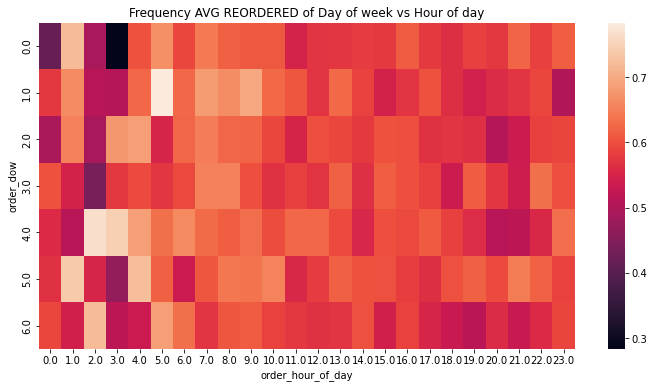

In [29]:
# turn it to heatmap-suited format, by pivot it
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')
grouped_df.head(3)

# display result in heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency AVG REORDERED of Day of week vs Hour of day")
plt.show()



 in general, for any days, highest between 5am to 9am


## #2

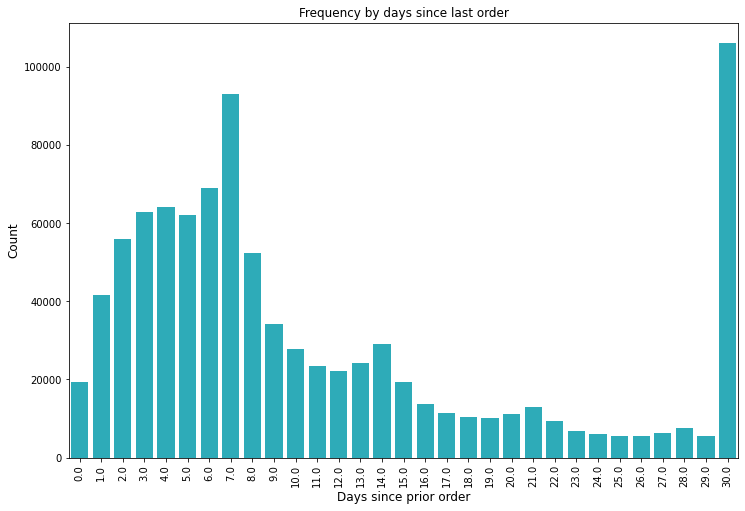

In [30]:
# How many days does the customers usually come back and buy again from us?
#(and out of all these orders, how many of them are reorders (returning customers) ?)

# dats_since_prior_order column given, hence just plot
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by days since last order")
plt.show()

# Customers usually come back to us once every 7 days or 30 days

## #3

In [31]:
# How many products are there in a single order ?


# group data by each orders (order_id), and aggregate 'Max' (add_to_cart_order is cumulative, hence Max)
grouped_df = order_prod_prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped_df

,order_id,add_to_cart_order
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3
...,...,...
104037,110716,1
104038,110717,1
104039,110718,7
104040,110719,2


In [32]:
# count how many times does a certain amount of order size occur
cnt_srs = grouped_df.add_to_cart_order.value_counts()
cnt_srs

6      7380
5      7347
4      7174
7      7106
3      6634
       ... 
127       1
83        1
75        1
109       1
95        1
Name: add_to_cart_order, Length: 75, dtype: int64

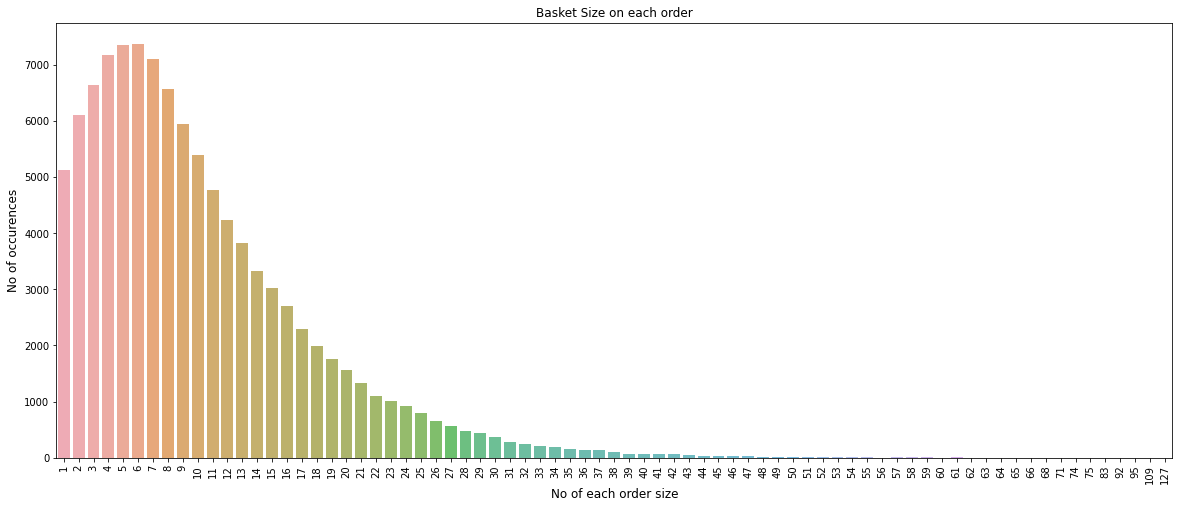

In [33]:
# display result
plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('No of occurences', fontsize=12)
plt.xlabel('No of each order size', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Basket Size on each order")
plt.show()


# 10 products per orders. with the most is 5. Note that it dropped exponentially after 10
# same result too in training data

## #4

In [34]:
organic = products['product_name'].str.contains('Organic')
products['is_organic'] = organic
products.iloc[20:30].head()

,product_id,product_name,aisle_id,department_id,is_organic
20,21,Small & Medium Dental Dog Treats,40,8,False
21,22,Fresh Breath Oral Rinse Mild Mint,20,11,False
22,23,Organic Turkey Burgers,49,12,True
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,False
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,False


In [35]:
print('Shape of Orders table: ', orders.shape)
orders.head(12)

Shape of Orders table:  (987959, 10)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,NaN,NaN,NaN
2,473747,1,prior,3,3,12,21.0,NaN,NaN,NaN
3,2254736,1,prior,4,4,7,29.0,NaN,NaN,112498.0
4,431534,1,prior,5,4,15,28.0,NaN,NaN,NaN
5,3367565,1,prior,6,2,7,19.0,NaN,NaN,143162.0
6,550135,1,prior,7,1,9,20.0,NaN,NaN,NaN
7,3108588,1,prior,8,1,14,14.0,NaN,NaN,NaN
8,2295261,1,prior,9,1,16,0.0,NaN,NaN,NaN
9,2550362,1,prior,10,4,8,30.0,NaN,NaN,NaN


In [36]:
# Which product that bought the most ? 


# merge past orders, product details, aisles details, dept details to one dataframe
order_products = pd.merge(order_prod_prior, products, on='product_id', how='left')
order_products = pd.merge(order_products, aisles, on='aisle_id', how='left')
order_products = pd.merge(order_products, depts, on='department_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,True,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,True,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,False,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,False,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,False,baking ingredients,pantry


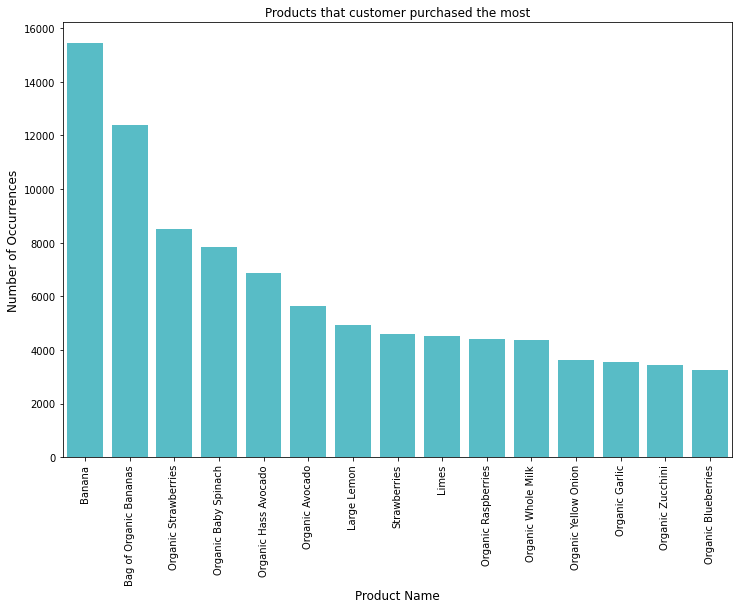

In [37]:
# display table that has most orders
cnt_srs = order_products['product_name'].value_counts().head(15)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Products that customer purchased the most")
plt.show()

# fruits (bananas, strawberries) & vegetables (spinach, onions, zucchini)

# How often a product is purchased?
5 Most Ordered Products
Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado


In [38]:
# which products that customer AVG REORDERED our product the most ?


# get avg reordered per product_name
grouped_df = order_products.groupby(["product_name"])["reordered"].aggregate("mean").reset_index()

# sort from highest to smallest, and get top15 only
grouped_df = grouped_df.sort_values('reordered', ascending=False)
grouped_df.head(10)


,product_name,reordered
17724,Micro Craft Beer,1.0
4589,Cantina Chipotle Salsa,1.0
32805,Tuna Creations Herb & Garlic Tuna,1.0
14466,Hot Links,1.0
32810,Tuna Fillets With Lemon And Pepper In Olive Oil,1.0
27341,Restaurant Style Mild Salsa,1.0
14481,Hot Ranchera Salsa,1.0
27337,Restaurant Recipe Italian Dressing,1.0
27335,Reserve Pinot Noir,1.0
4592,Cantina Thins Tortilla Chips,1.0


## #5

In [39]:
# Which aisles that customer purchased the most ? 
cnt_srs = order_products['aisle'].value_counts().head(30)

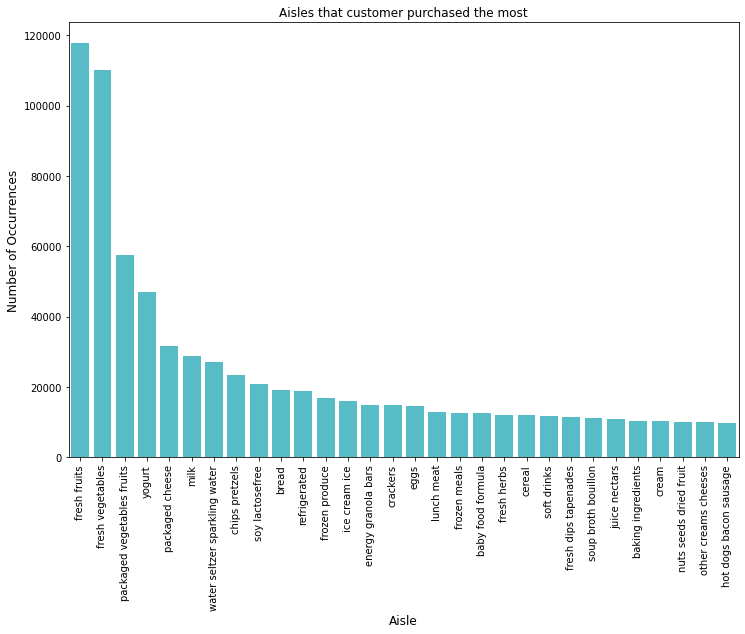

In [40]:

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Aisles that customer purchased the most")
plt.show()

# As expected from #4, fruits & vege

WE can say that customer purchased fruit and vege aisles mostly

In [41]:
# which aisles that customer AVG REORDERED our product the most ?


# get avg reordered per aisle
grouped_df = order_products.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()

# sort from highest to smallest, and get top15 only
grouped_df = grouped_df.sort_values('reordered', ascending=False).head(40)

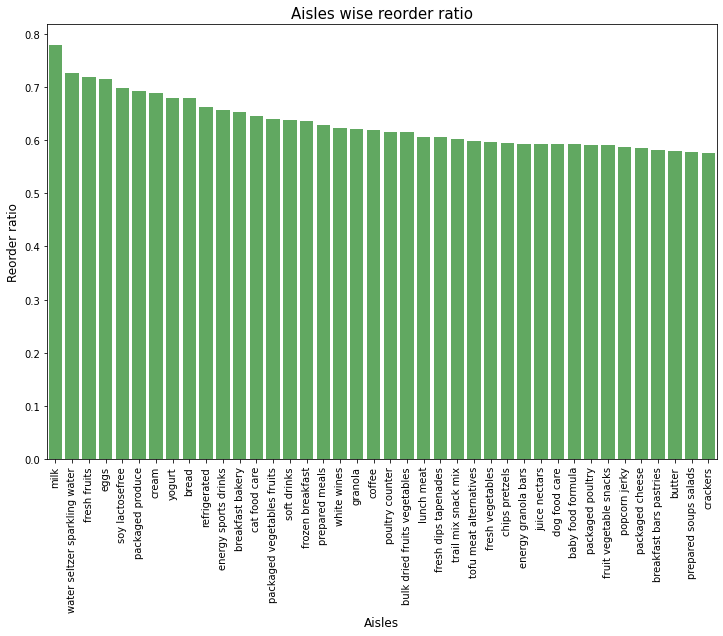

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_df['aisle'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisles', fontsize=12)
plt.title("Aisles wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# fruits & vege might be highest in qty, but reordering wise, milk & sparkling water at top, (fruits at 3rd, vegetables aren't even at top15)

milk and sparkling water aisles reorder most.
fruits & vege might be highest in qty, 
but reordering wise, milk & sparkling water at top, (fruits at 3rd, vegetables aren't even at top15)

## #6

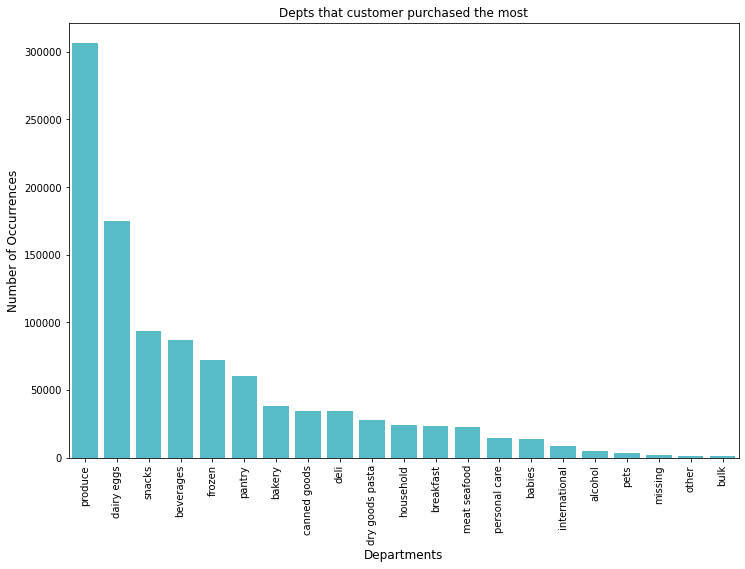

In [43]:
# Which depts that customer purchased the most ? 
cnt_srs = order_products['department'].value_counts().head(25)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Depts that customer purchased the most")
plt.show()

# Top3 are Produce, dairy egg, snacks

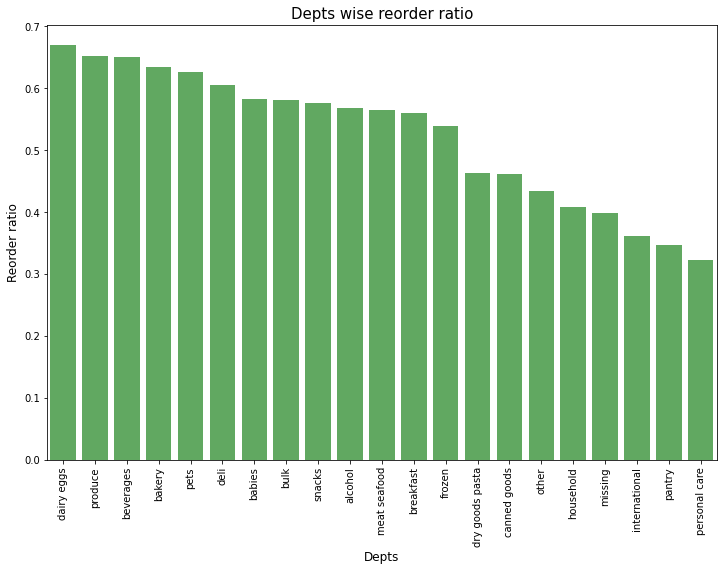

In [44]:
# Which depts that customer AVG REORDERED our product the most ?

# get avg reordered per dept
grouped_df = order_products.groupby(["department"])["reordered"].aggregate("mean").reset_index()

# sort from highest to smallest, and get top15 only
grouped_df = grouped_df.sort_values('reordered', ascending=False).head(25)


plt.figure(figsize=(12,8))
sns.barplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Depts', fontsize=12)
plt.title("Depts wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Top3 are Dairy Eggs, Beverages, Produce

# Result

1. Which day & at which hour does.....
     * customer purchase our products the most?
         * Saturday 12.00-16.00 & Sun 9.00-12.00 has most orders 
         
     * customer AVG REORDERED our products the most?
        * highest on Sunday between 6am to 9am (nice)
        * in general, for any days, highest between 5am to 9am
        * interpretation : 0.66 means, 66% of all orders are actually reorders (returning customers)

2. How many days does the customers usually come back and buy again from us? (and out of all these orders, how many of them are reorders (returning customers) ?)
    * Customers usually come back to us once every 7 days or 30 days
    * And out of all those orders, 58.97% are reorders (returning customers)

3. How many products are there in a single order ?
    * 10 products per orders. with the most is 5. Note that it dropped exponentially after 10
    
4. Which products that....
    * customer purchased the most ? 
        * Fruits (bananas, strawberries) & vegetables (spinach, onions, zucchini)
        
    * customer AVG REORDERED the most ?
        * Completely different than in qty wise. Top 3 are vege wrappers, pads, energy shots, chocolate bar. No fruits & veges at all in top 15
        
5. Which aisles that....
    * customer purchased the most ? 
        * Fruits & Vege
        
    * customer AVG REORDERED the most ?
        * fruits & vege might be highest in qty, but reordering wise, milk & sparkling water at top, (fruits at 3rd, vegetables aren't even at top15)
        
6. Which depts that....
    * customer purchased the most ? 
        * Top3 are Produce, dairy egg, snacks
        
    * customer AVG REORDERED the most ?
        * Top3 are Dairy Eggs, Beverages, Produce, quite similar as qty

# Purchasing behaviour on Departments and Aisles


Count of products in each department

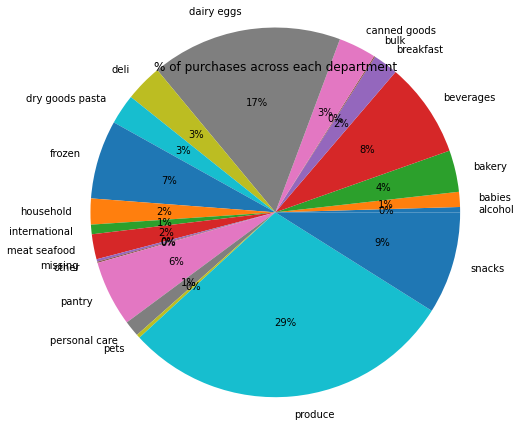

In [45]:
# From All ordered products, the count of contribution of each department
# Group by the count of ordering from a department
total_ordered_products = order_products.shape[0]
groupeddf = order_products.groupby(['department'], as_index=False).count().rename(columns={'department_id':'count_of_ordered_prods'})

fig = plt.figure(figsize = (20, 5))
plt.pie(groupeddf['count_of_ordered_prods'], labels = groupeddf['department'], autopct='%.0f%%', radius=1.7)
plt.title('% of purchases across each department')
plt.show()

In [46]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import  combinations,groupby

orders=pd.read_csv('D:\Documents\order_products__prior.csv')


In [47]:
orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [48]:
orders = orders.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(15))
type(orders)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
3    24838
3    17704
3    21903
3    17668
3    46667
Name: item_id, dtype: int64

pandas.core.series.Series

In [49]:
print('dimensions: {0};      unique_orders: {1};   unique_items: {2}'
      .format(orders.shape, len(orders.index.unique()), len(orders.value_counts())))

dimensions: (1048575,);      unique_orders: 104042;   unique_items: 35449


In [50]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")
freq(orders)

24852    15450
13176    12409
21137     8528
21903     7852
47209     6857
         ...  
6524         1
11935        1
30401        1
45880        1
331          1
Name: freq, Length: 35449, dtype: int64

In [51]:
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


In [52]:
# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

In [53]:
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

In [54]:
# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]             

# Assosiation Rule Function

In [57]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support (`freq` is same as term `support-count`)
    item_stats             = freq(order_item).to_frame("freq") # `.to_frame()` converts the Series into pd.DF with 
                                                               # index - "product_id" ("Milk", "Apple", ...)
                                                               # df with only 1 col - "freq" (freq count of the product)
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100
                                        # new col `support` added to df with `freq` col


    # Filter from order_item items below min support (Pruning based on Apriori Algorithm)
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index #get indices(i.e "product_id"s) satisfying the condition
    order_item             = order_item[order_item.isin(qualifying_items)] # based on the "indices", filter `order_item`s

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [58]:
%%time
rules = association_rules(orders, 0.01)  

Starting order_item:                1048575
Items with support >= 0.01:           10984
Remaining order_item:                969090
Remaining orders with 2+ items:       97533
Remaining order_item:                963196
Item pairs:                         3767829
Item pairs with support >= 0.01:      55355

CPU times: total: 18.1 s
Wall time: 18.3 s


In [59]:
item_name   = pd.read_csv('D:\Documents\products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Uncured Bacon + Cranberry Bison Bar,"Turkey Bar, Almond + Cranberry",10,0.010253,33,0.033835,25,0.025632,0.303030,0.400000,11.822182
1,Gobble Gobble Turkey Pouch Stage 3,Stage 3 Hearty Meals - Chick Chick Organic Bab...,12,0.012304,30,0.030759,35,0.035885,0.400000,0.342857,11.146629
2,Organic Nondairy Strawberry Cashew Yogurt,Organic Cashew Nondairy Blueberry Yogurt,10,0.010253,35,0.035885,27,0.027683,0.285714,0.370370,10.320952
3,Organic Stage 3 Zucchini Broccoli Medley Baby ...,Organic Spring Vegetables & Pasta Stage 3 Baby...,10,0.010253,44,0.045113,22,0.022556,0.227273,0.454545,10.075723
5,Antioxidant Infusions Brasilia Blueberry,Antioxidant Infusions Costa Rica Clementine,11,0.011278,34,0.034860,34,0.034860,0.323529,0.323529,9.280822
...,...,...,...,...,...,...,...,...,...,...,...
15061,Organic Strawberries,Strawberries,23,0.023582,8486,8.700645,4550,4.665088,0.002710,0.005055,0.000581
3717,Organic Avocado,Organic Hass Avocado,12,0.012304,5633,5.775481,6843,7.016087,0.002130,0.001754,0.000304
8710,Organic Hass Avocado,Organic Avocado,11,0.011278,6843,7.016087,5633,5.775481,0.001607,0.001953,0.000278
1635,Banana,Bag of Organic Bananas,24,0.024607,15377,15.765946,12319,12.630597,0.001561,0.001948,0.000124
